# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

file_url = 'https://raw.githubusercontent.com/tinlong/AIML/main/Python%20Foundations/Project%201/foodhub_order.csv'

In [3]:
# read the data
df = pd.read_csv(file_url)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
# use shape to check on number of rows and columns
df.shape

(1898, 9)

#### Observations:
Result: 1898 rows, 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- Both IDs (order and customer) are integer, which is expected. Also as integer are food_preparation_time and delivery_time.
- Cost of the order is as of float64, which is expected.
- Rating is imported as string, but in reality, the rating should be numerical (1-5). We need to check why this is the case.

In [7]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

Ah-ha, values existed in this column is 5, 4, 3 (assuming stars) and "Not given". We will deal with it in the following steps.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# According to df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


It looks like there are no NULL nor NA values exists.

However, looking at the imported dataframe again, the first two **rating** entries are "Not given". Is this missing value, or is this a valid choice? Chances are, it is missing not because of data collection error, but like a user really did not put in any star rating. In this case, "Not given" is a valid choice. This has a couple of complications:

1. The entries in 'rating' is categorical.
2. But we still want rating in numerical format for some other analysis.

In [4]:
# 1. Make rating's "Not given" to become null/NA
# 2. Change the rating column to be int64
# Assign the result into a new column.

df['rating_num'] = df['rating'].replace("Not given", np.nan).astype('float')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_num             1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


#### Observations:

Rating (when cast as numeric) has missing values. 1898 - 1162 = 736 missing (38.78%)

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
rating_num,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0


#### Observations:

For food preparation time:

- Minimum: 20 minutes
- Average (mean): 27.37 minutes
- Maximum: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Write the code here
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:

Ans: 736 records had ratings "Not given".

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

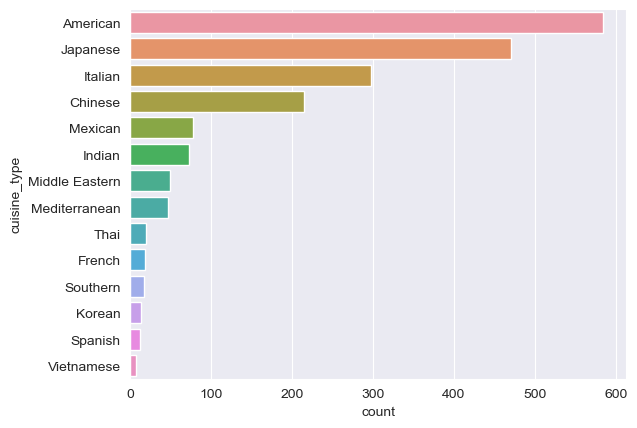

In [12]:
# Cuisine Type

sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.show()

#### Observations:

For cuisine type, most people order American food, followed by Japanese, Italian and Chinese.

In [12]:
df.restaurant_name.value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

We have a total of 178 restaurants here. The graph would become so condense that it does not make sense to display them.

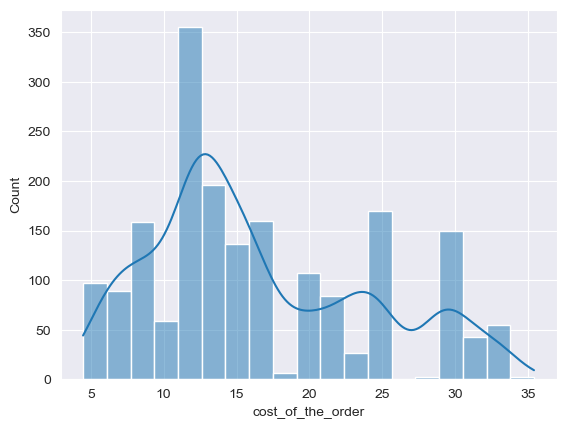

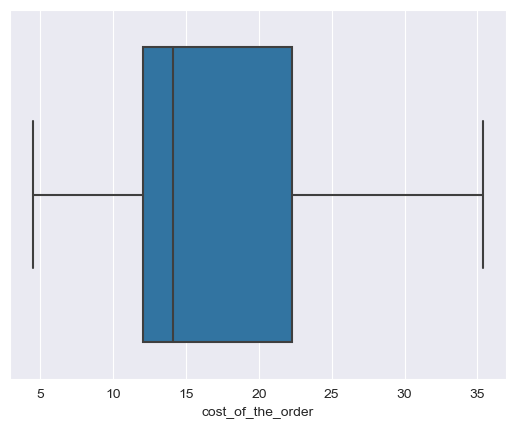

In [14]:
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

#### Observations:

Most people places order costing around 10-20 dollars, with cheapest as 5 dollars and most expensive as 35 dollars. The data seems right skewed, and there is no outliers as the graph's concern.

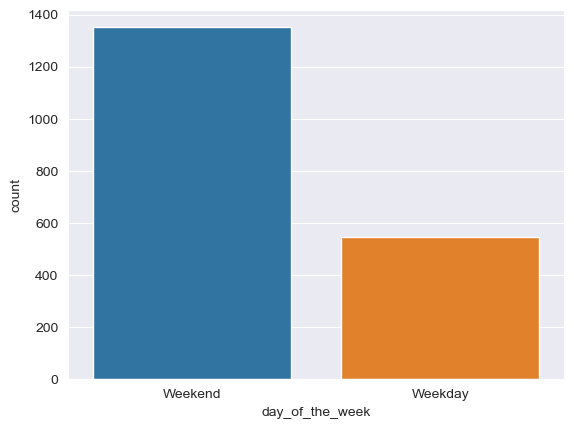

'71.18%'

In [15]:
sns.countplot(data=df, x='day_of_the_week')
plt.show()
f"{df[df.day_of_the_week == 'Weekend'].size / df.size:.2%}"

Most orders were placed in the weekend (71.18%).

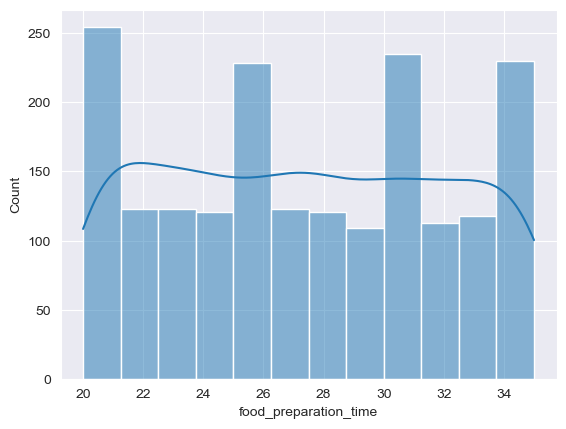

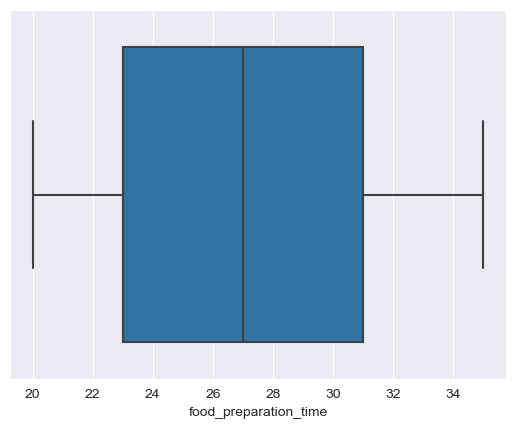

In [16]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

#### Observations:

Food preparation time appears to be pretty evenly distributed. 

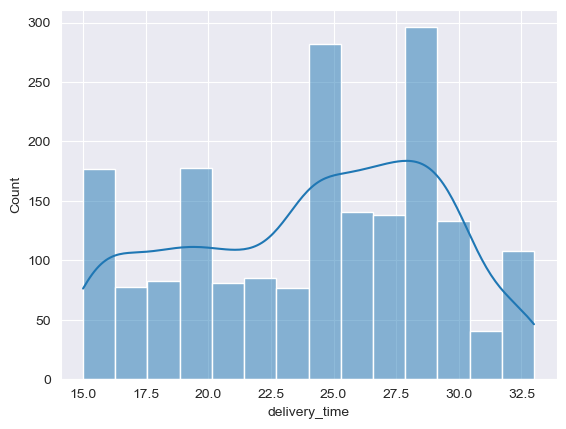

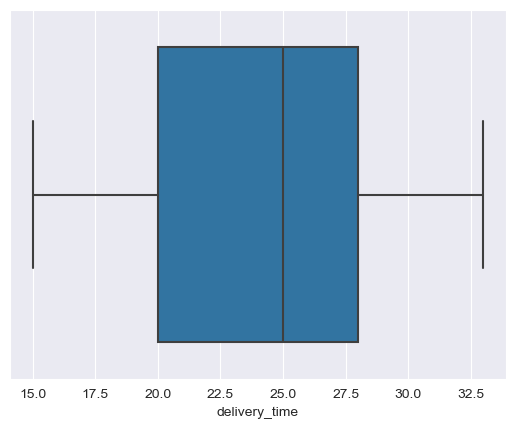

In [17]:
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

Delivery time seems to be a bit left skewed, with the majority of orders needing about 25-30 minutes to deliver.

In [5]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df['total_time'].describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: total_time, dtype: float64

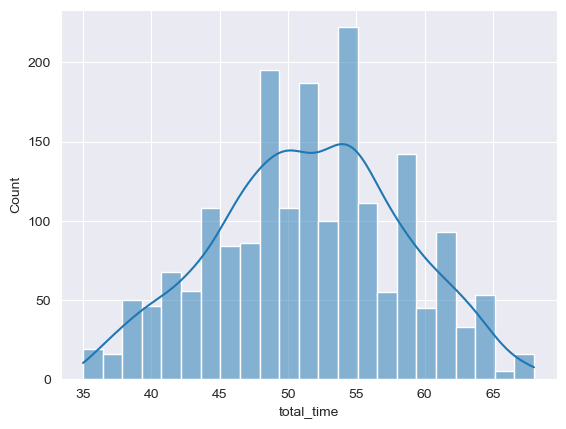

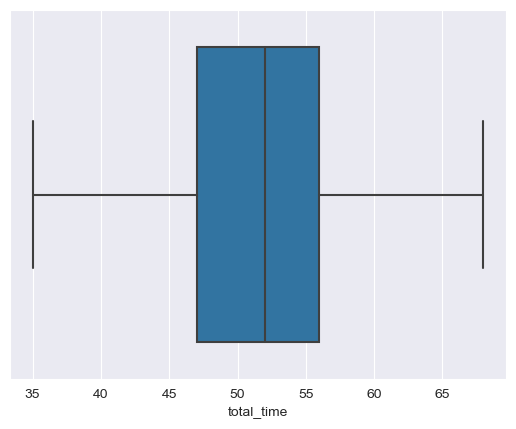

In [19]:
sns.histplot(data=df, x='total_time', kde=True)
plt.show()
sns.boxplot(data=df, x='total_time')
plt.show()

If we add up the food preparation time and delivery time to indicate the actual order's fulfillment time, the order fulfillment is normally distributed.

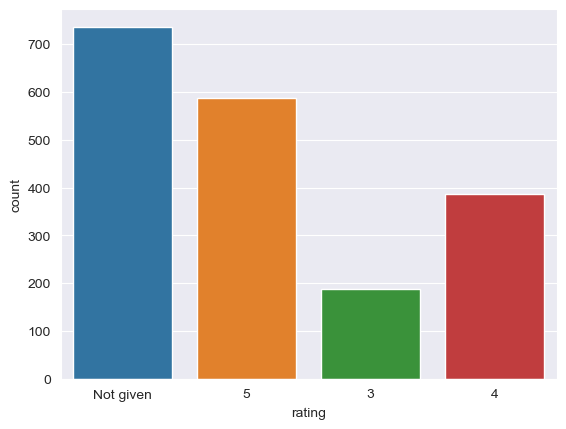

In [20]:
sns.countplot(data=df, x='rating');

Most orders was not given a rating. For those that were given ratings, only a few got the lowest '3', which is still not bad - but perhaps the users were being polite.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
df.value_counts('restaurant_name').head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [14]:
df[df.day_of_the_week == 'Weekend'].value_counts('cuisine_type').head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:

American is the most popular cuisine on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
f"{df[df.cost_of_the_order > 20].size / df.size:.2%}"

'29.24%'

#### Observations:

29.24% of the orders are more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [15]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

Mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [16]:
df.value_counts('customer_id').head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

Here are the 3 customers ordering the most:

- 52832 ordered 13 times
- 47440 ordered 10 times
- 83287 ordered 9 times

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


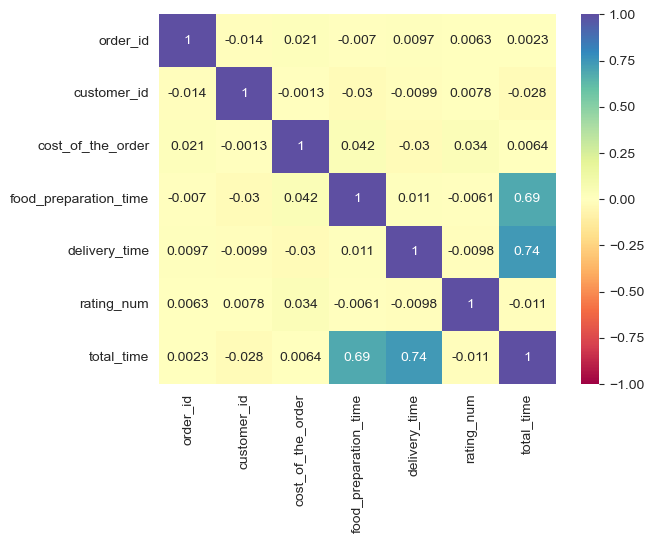

In [26]:
# First, let us look at whether any numerical values have correlation

df_corr = df.corr(numeric_only=True)

sns.heatmap(data=df_corr, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

Basically, there is no strong correlation between any data within the original dataframe (excluding the columns added during the process). This means, we should focus on relationships between numerical data and categorical data.

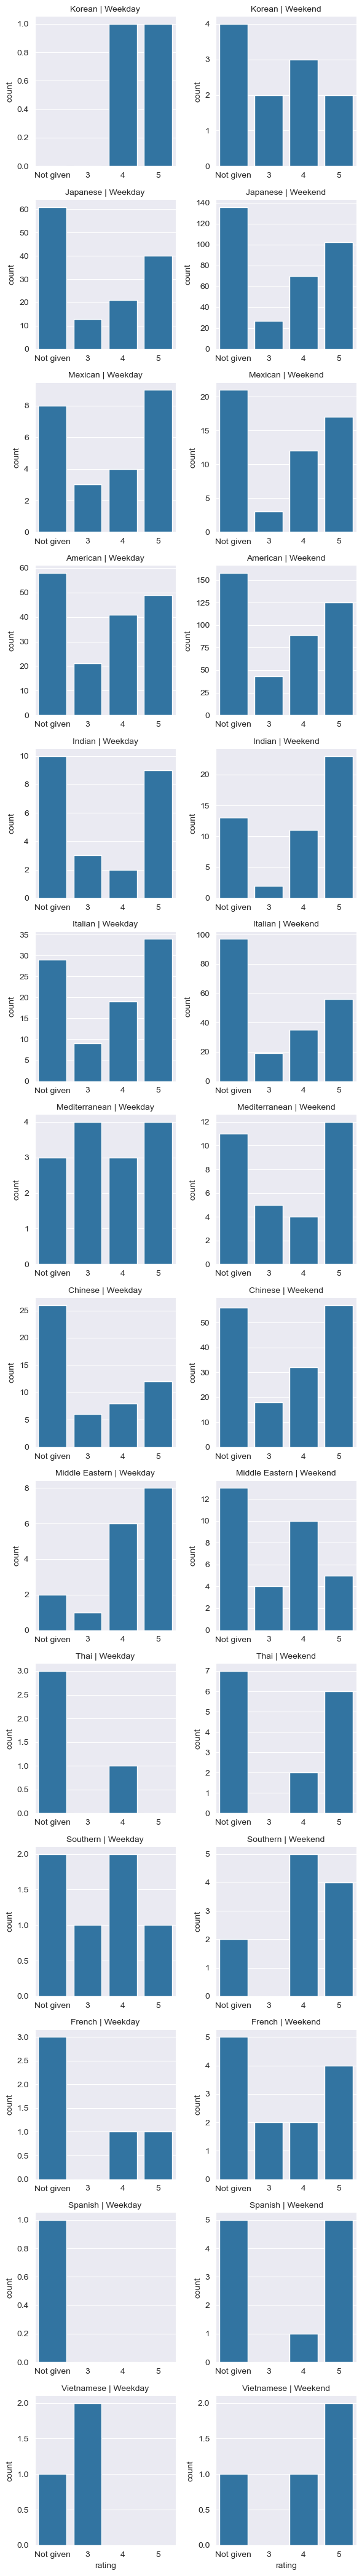

In [34]:
# for a facetgrid with day_of_the_week as the column, and cuisine_type as the row
g = sns.FacetGrid(data=df, col='day_of_the_week', row='cuisine_type', sharex=False, sharey=False, col_order=['Weekday', 'Weekend'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.map(sns.countplot, 'rating', order=['Not given', '3', '4', '5'])

In [7]:
time_analysis = df.melt(id_vars=['order_id', 'cuisine_type', 'day_of_the_week'], value_vars=['food_preparation_time', 'delivery_time'], var_name='time_type', value_name='time')
time_analysis.sort_values(by=['order_id', 'day_of_the_week']).head()

,order_id,cuisine_type,day_of_the_week,time_type,time
1571,1476547,American,Weekend,food_preparation_time,22
3469,1476547,American,Weekend,delivery_time,24
357,1476548,Japanese,Weekend,food_preparation_time,20
2255,1476548,Japanese,Weekend,delivery_time,30
1200,1476549,Indian,Weekend,food_preparation_time,25


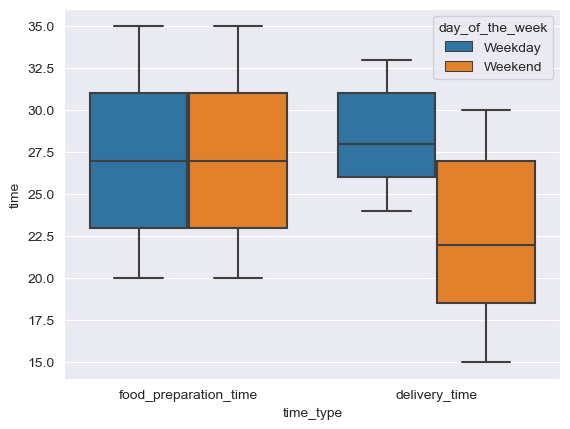

In [8]:
sns.boxplot(data=time_analysis, x='time_type', y='time', hue='day_of_the_week', hue_order=['Weekday', 'Weekend'])
plt.show()

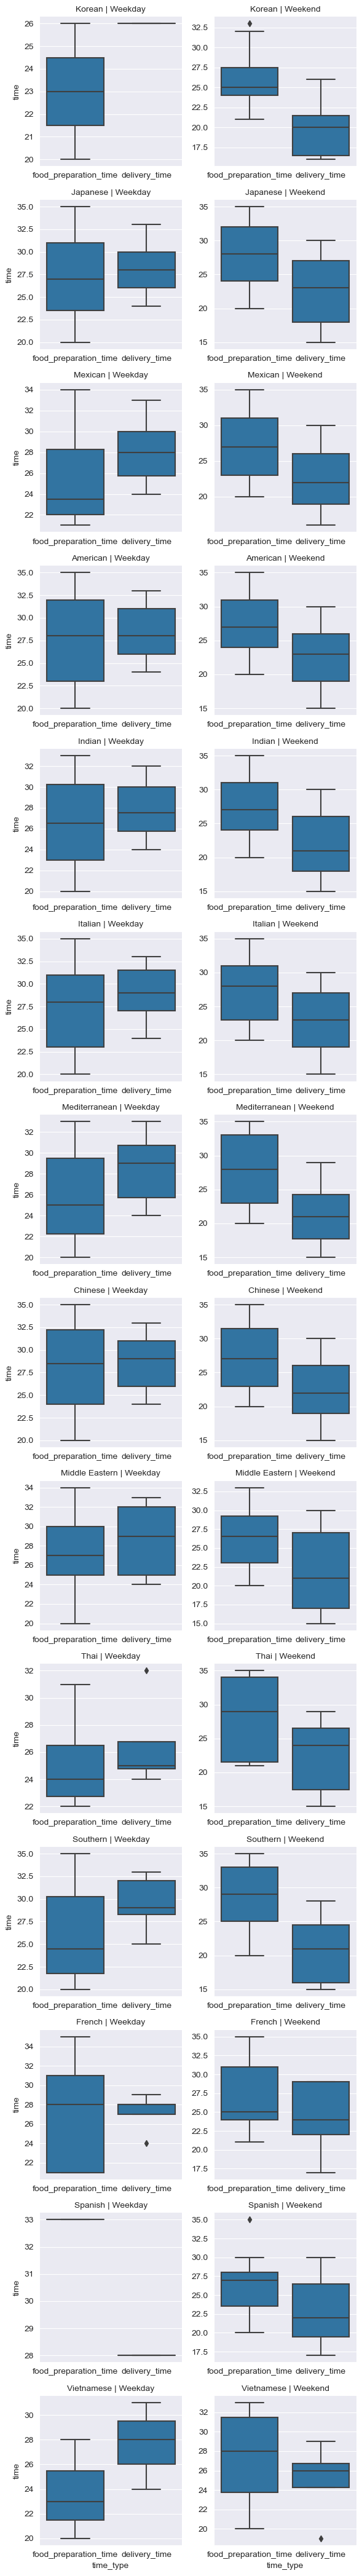

In [11]:
g = sns.FacetGrid(data=time_analysis, col='day_of_the_week', row='cuisine_type', sharex=False, sharey=False, col_order=['Weekday', 'Weekend'])
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.map(sns.boxplot, 'time_type', 'time', order=['food_preparation_time', 'delivery_time'])

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [27]:
ratings = df[df.rating != 'Not given'].groupby(['restaurant_name']).agg(num_of_reviews=('rating_num', 'size'), rating_avg=('rating_num', 'mean'))
ratings[ratings.num_of_reviews > 50]

,num_of_reviews,rating_avg
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [6]:
# We can make a column for all order's app_cost, then add them together

app_cost_app = lambda x: x * 0.25 if x > 20 else (x * 0.15 if x > 5 else 0)

df['app_cost'] = df['cost_of_the_order'].apply(app_cost_app)

df['app_cost'].sum()

6166.303

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
f"{df[df.total_time > 60].size / df.size:.2%}"

'10.54%'

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---